# Prodigy infotech Task-2
# Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.
# Name: Pola Harsha(ML Intern)


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [21]:
customer_data=pd.read_csv('Mall_Customers.csv')

In [22]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [24]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [28]:
X=customer_data.drop(columns=['CustomerID','Gender','Age'],axis=1).values

# Visualize the data points

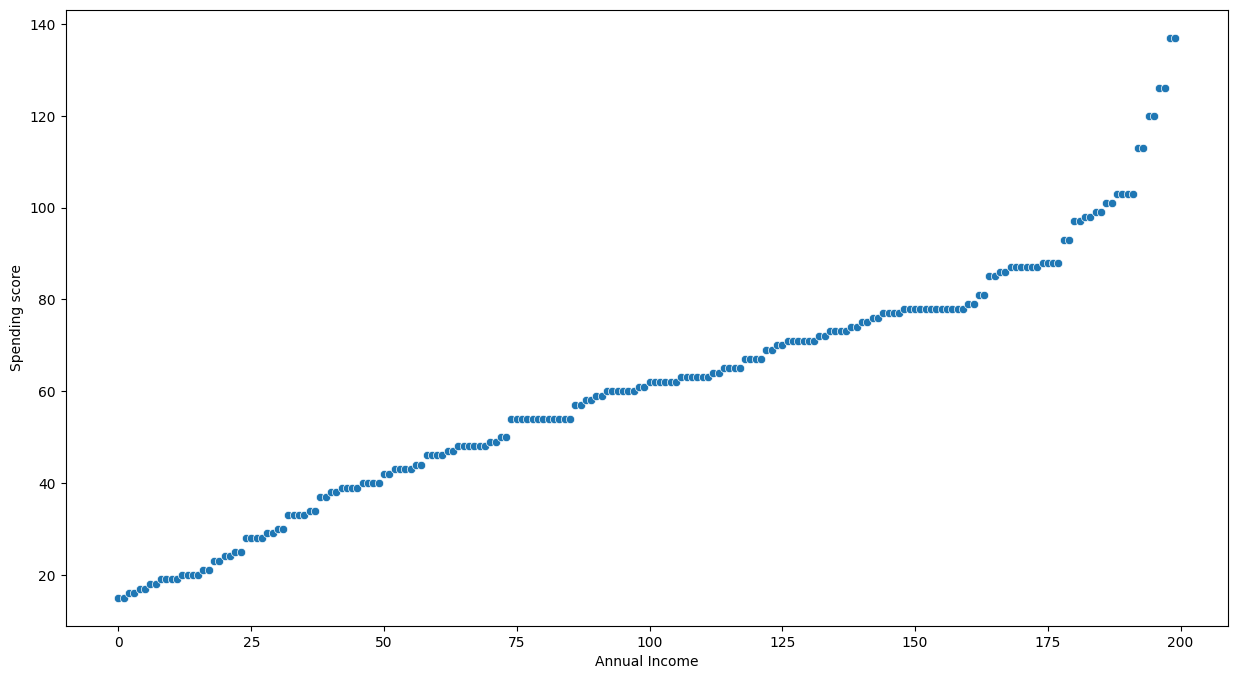

In [32]:
plt.figure(figsize=(15,8))
sns.scatterplot(X[:,0])
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.show()

C:\Users\Pola harsha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Pola harsha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Pola harsha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Pola harsha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto

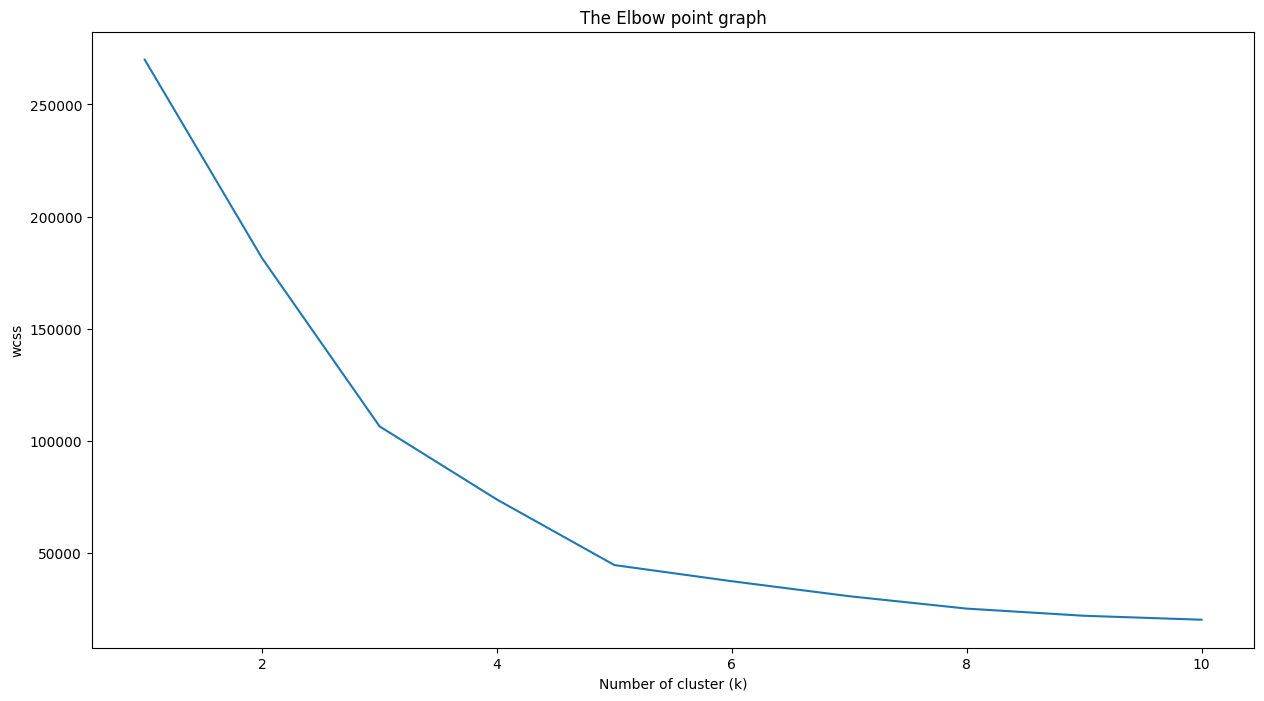

In [36]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=2)    
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(range(1,11),wcss)
plt.title('The Elbow point graph')
plt.xlabel("Number of cluster (k)")
plt.ylabel("wcss")
plt.show()

# wcss doesn't reduce much after k=5. So, we can choose 5 as the perfect k value or Clusters.
# Training the K-means algorithm on the tarining dataset

In [48]:
kmeans = KMeans(n_clusters=5, init='k-means++',random_state=0)
Y=kmeans.fit_predict(X)

C:\Users\Pola harsha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Centroid points 

In [42]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

# Visualize the clusters formed

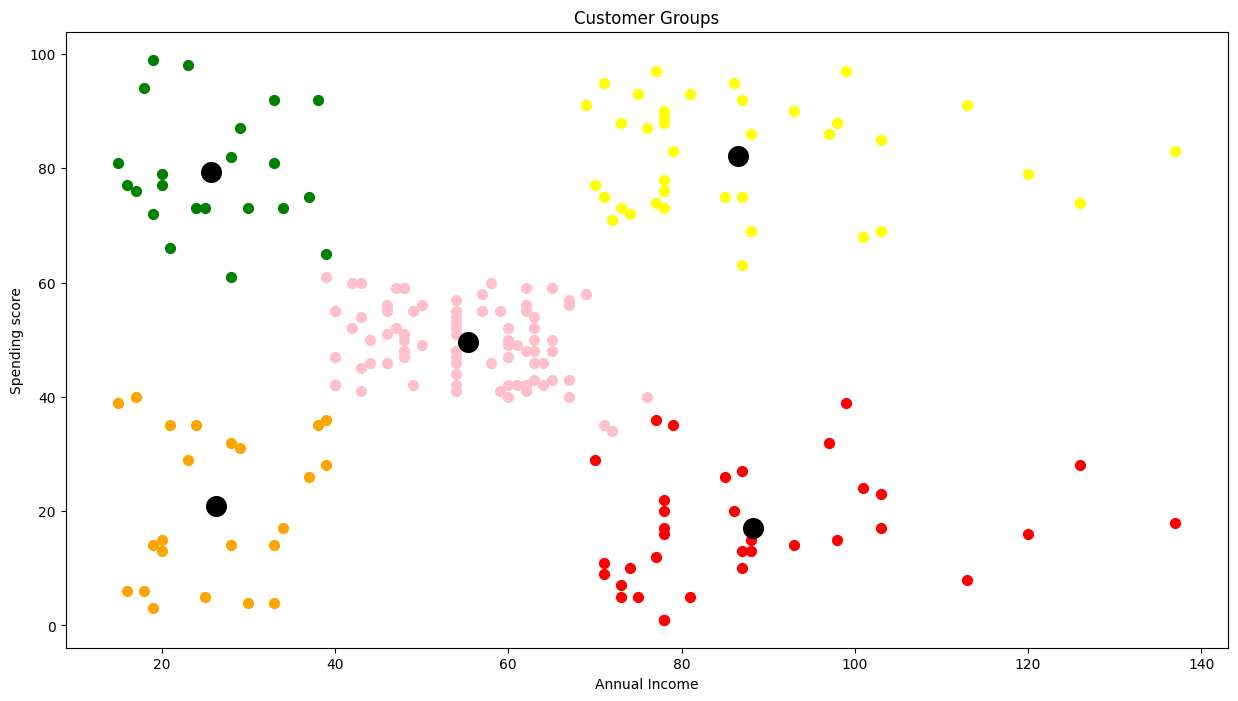

In [52]:
plt.figure(figsize= (15,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='red', label='Cluster 1') 
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='pink' , label= 'Cluster 2') 
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c= 'yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='green' , label= 'Cluster 4')
plt.scatter (X[Y==4,0], X[Y==4,1], s=50, c='orange', label='Cluster 5') 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black') 
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.show()